# Atividade semana 3 - Redes Neurais Recorrentes

João Victor Cordeiro - 123131

In [23]:
from pandas import read_csv
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

# Importando os dados

In [24]:
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python') # usecols=[1] = Coluna Open
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

tesla_url = 'https://raw.githubusercontent.com/JoaoCordeir0/deep_learning_ufv/refs/heads/main/rede-neural-recorrente/tesla_stock_2015_2022.csv'
train_data, test_data, data = get_train_test(tesla_url)

# Preparação dos dados

In [25]:
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

# Construindo e avaliando o modelo - Parte 1

- Inicie com uma única camada LSTM, como no exemplo original, mas com 50 unidades ocultas.

### Criando o modelo

In [4]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1), activation=['tanh', 'tanh'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Treinando o modelo

In [5]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=1, verbose=2)

Epoch 1/20
109/109 - 4s - 40ms/step - loss: 9.5023e-04 - val_loss: 0.0045
Epoch 2/20
109/109 - 1s - 5ms/step - loss: 1.6940e-04 - val_loss: 0.0032
Epoch 3/20
109/109 - 1s - 5ms/step - loss: 5.4185e-05 - val_loss: 0.0064
Epoch 4/20
109/109 - 0s - 4ms/step - loss: 1.7668e-04 - val_loss: 0.0029
Epoch 5/20
109/109 - 1s - 5ms/step - loss: 5.8920e-05 - val_loss: 0.0026
Epoch 6/20
109/109 - 0s - 5ms/step - loss: 1.0566e-04 - val_loss: 0.0028
Epoch 7/20
109/109 - 1s - 6ms/step - loss: 4.8657e-05 - val_loss: 0.0028
Epoch 8/20
109/109 - 1s - 6ms/step - loss: 8.4128e-05 - val_loss: 0.0039
Epoch 9/20
109/109 - 1s - 6ms/step - loss: 8.2646e-05 - val_loss: 0.0039
Epoch 10/20
109/109 - 1s - 6ms/step - loss: 8.1558e-05 - val_loss: 0.0024
Epoch 11/20
109/109 - 1s - 5ms/step - loss: 6.8427e-05 - val_loss: 0.0025
Epoch 12/20
109/109 - 1s - 6ms/step - loss: 4.7848e-05 - val_loss: 0.0025
Epoch 13/20
109/109 - 0s - 4ms/step - loss: 8.9415e-05 - val_loss: 0.0025
Epoch 14/20
109/109 - 1s - 5ms/step - loss: 4.

### Avaliando o treinamento

Raíz do Erro Médio Quadrático

In [6]:
def print_error(trainY, testY, train_predict, test_predict):
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))

    print('Raíz do Erro Médio Quadrático para Treino: %.3f' % (train_rmse))
    print('Raíz do Erro Médio Quadrático para Teste: %.3f' % (test_rmse))

train_predict = model.predict(trainX)
test_predict = model.predict(testX)

print_error(trainY, testY, train_predict, test_predict)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Raíz do Erro Médio Quadrático para Treino: 0.006
Raíz do Erro Médio Quadrático para Teste: 0.049


Plot de valores das ações vs valores previstos

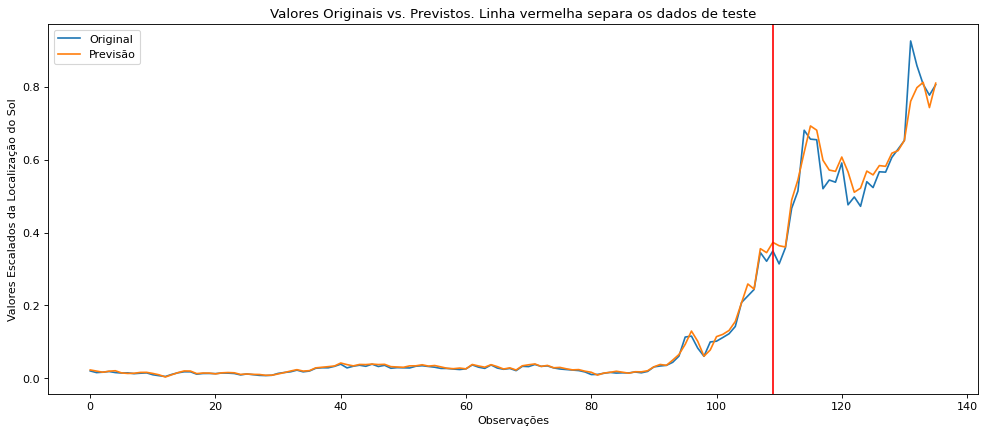

In [7]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Original', 'Previsão'])
    plt.xlabel('Observações')
    plt.ylabel('Valores Escalados da Localização do Sol')
    plt.title('Valores Originais vs. Previstos. Linha vermelha separa os dados de teste')

plot_result(trainY, testY, train_predict, test_predict)

### Reporte do resultado obtido

Com uma única camada LSTM com 50 unidades ocultas, o modelo se saiu bem na revisão. O baixo erro médio quadrático nos dados de treino (0.006) mostra que ele aprendeu os padrões antigos. E o erro também baixo nos dados de teste (0.049), junto com a semelhança entre os valores previstos e reais no gráfico indica que ele consegue lidar bem com dados novos. Tudo isso mostra que o modelo é bom em entender como as ações se comportam.

# Construindo e avaliando o modelo - Parte 2

- Experimente adicionar mais uma camada LSTM após a primeira (mesmo número de unidades ocultas do item anterior). Reporte o resultado da mesma forma que o item anterior e comente se houve melhora

### Criando o modelo

In [12]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=input_shape, activation=activation[0], return_sequences=True))
    model.add(LSTM(hidden_units, input_shape=input_shape, activation=activation[0], return_sequences=False))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1), activation=['tanh', 'tanh'])

### Treinando o modelo

In [13]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=1, verbose=2)

Epoch 1/20
109/109 - 3s - 23ms/step - loss: 9.0516e-04 - val_loss: 0.0196
Epoch 2/20
109/109 - 1s - 8ms/step - loss: 1.9821e-04 - val_loss: 0.0079
Epoch 3/20
109/109 - 1s - 6ms/step - loss: 6.5656e-04 - val_loss: 0.0776
Epoch 4/20
109/109 - 1s - 6ms/step - loss: 2.6686e-04 - val_loss: 0.0033
Epoch 5/20
109/109 - 1s - 11ms/step - loss: 7.4081e-05 - val_loss: 0.0034
Epoch 6/20
109/109 - 1s - 6ms/step - loss: 1.1014e-04 - val_loss: 0.0033
Epoch 7/20
109/109 - 1s - 6ms/step - loss: 1.0510e-04 - val_loss: 0.0029
Epoch 8/20
109/109 - 1s - 6ms/step - loss: 9.4410e-05 - val_loss: 0.0052
Epoch 9/20
109/109 - 1s - 6ms/step - loss: 1.0062e-04 - val_loss: 0.0037
Epoch 10/20
109/109 - 1s - 12ms/step - loss: 9.5289e-05 - val_loss: 0.0035
Epoch 11/20
109/109 - 1s - 8ms/step - loss: 1.9599e-04 - val_loss: 0.0118
Epoch 12/20
109/109 - 1s - 8ms/step - loss: 2.0090e-04 - val_loss: 0.0662
Epoch 13/20
109/109 - 1s - 5ms/step - loss: 3.8079e-04 - val_loss: 0.0087
Epoch 14/20
109/109 - 1s - 6ms/step - loss: 

### Avaliando o treinamento

Raíz do Erro Médio Quadrático

In [14]:
def print_error(trainY, testY, train_predict, test_predict):
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))

    print('Raíz do Erro Médio Quadrático para Treino: %.3f' % (train_rmse))
    print('Raíz do Erro Médio Quadrático para Teste: %.3f' % (test_rmse))

train_predict = model.predict(trainX)
test_predict = model.predict(testX)

print_error(trainY, testY, train_predict, test_predict)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Raíz do Erro Médio Quadrático para Treino: 0.011
Raíz do Erro Médio Quadrático para Teste: 0.057


Plot de valores das ações vs valores previstos

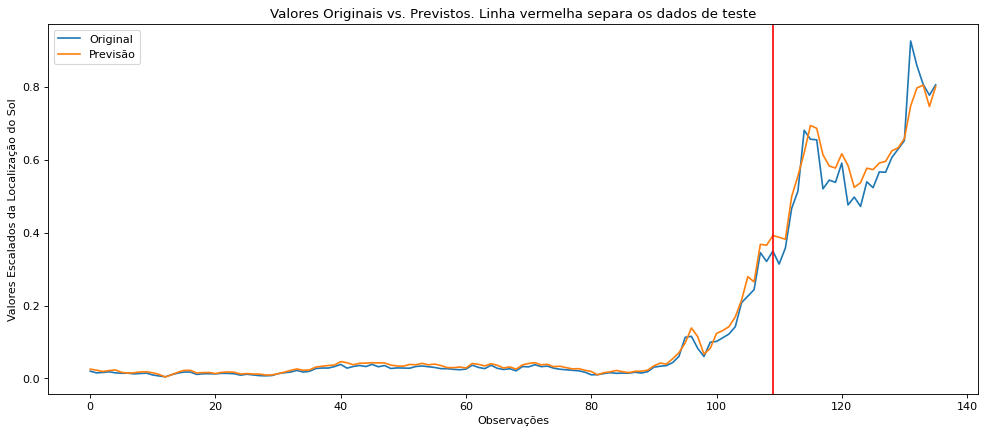

In [15]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Original', 'Previsão'])
    plt.xlabel('Observações')
    plt.ylabel('Valores Escalados da Localização do Sol')
    plt.title('Valores Originais vs. Previstos. Linha vermelha separa os dados de teste')

plot_result(trainY, testY, train_predict, test_predict)

### Reporte do resultado obtido


Colocar uma segunda camada LSTM no modelo, ambas com 50 unidades ocultas, fez o erro médio quadrático subir um pouco nos dados de treino (de 0.006 para 0.011) e nos de teste (de 0.049 para 0.057). Isso quer dizer que o modelo com duas camadas não foi melhor que o mais simples. Mesmo que redes mais profundas possam entender padrões mais complicados, aqui, essa camada extra pode ter complicado demais as coisas, atrapalhando o ajuste aos dados. Então, a versão com uma camada LSTM só se saiu melhor nessa tarefa.

# Construindo e avaliando o modelo - Parte 3

- Adicione um Dropout de 20% após cada camada LSTM e reporte se houve melhora.

### Criando o modelo

In [19]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=input_shape, activation=activation[0], return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(hidden_units, input_shape=input_shape, activation=activation[0], return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1), activation=['tanh', 'tanh'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Treinando o modelo

In [20]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=1, verbose=2)

Epoch 1/20
109/109 - 4s - 34ms/step - loss: 9.0169e-04 - val_loss: 0.0496
Epoch 2/20
109/109 - 2s - 16ms/step - loss: 3.4818e-04 - val_loss: 0.0038
Epoch 3/20
109/109 - 1s - 10ms/step - loss: 1.8497e-04 - val_loss: 0.0194
Epoch 4/20
109/109 - 1s - 7ms/step - loss: 4.3151e-04 - val_loss: 0.0424
Epoch 5/20
109/109 - 1s - 6ms/step - loss: 7.0380e-04 - val_loss: 0.0535
Epoch 6/20
109/109 - 1s - 6ms/step - loss: 2.6338e-04 - val_loss: 0.0109
Epoch 7/20
109/109 - 1s - 12ms/step - loss: 1.4342e-04 - val_loss: 0.0032
Epoch 8/20
109/109 - 1s - 12ms/step - loss: 5.2189e-04 - val_loss: 0.0995
Epoch 9/20
109/109 - 1s - 7ms/step - loss: 4.5577e-04 - val_loss: 0.0042
Epoch 10/20
109/109 - 1s - 11ms/step - loss: 1.8785e-04 - val_loss: 0.0047
Epoch 11/20
109/109 - 1s - 6ms/step - loss: 2.0252e-04 - val_loss: 0.0174
Epoch 12/20
109/109 - 1s - 6ms/step - loss: 1.3530e-04 - val_loss: 0.0036
Epoch 13/20
109/109 - 1s - 6ms/step - loss: 1.1967e-04 - val_loss: 0.0034
Epoch 14/20
109/109 - 1s - 8ms/step - los

### Avaliando o treinamento

Raíz do Erro Médio Quadrático

In [21]:
def print_error(trainY, testY, train_predict, test_predict):
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))

    print('Raíz do Erro Médio Quadrático para Treino: %.3f' % (train_rmse))
    print('Raíz do Erro Médio Quadrático para Teste: %.3f' % (test_rmse))

train_predict = model.predict(trainX)
test_predict = model.predict(testX)

print_error(trainY, testY, train_predict, test_predict)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Raíz do Erro Médio Quadrático para Treino: 0.007
Raíz do Erro Médio Quadrático para Teste: 0.071


Plot de valores das ações vs valores previstos

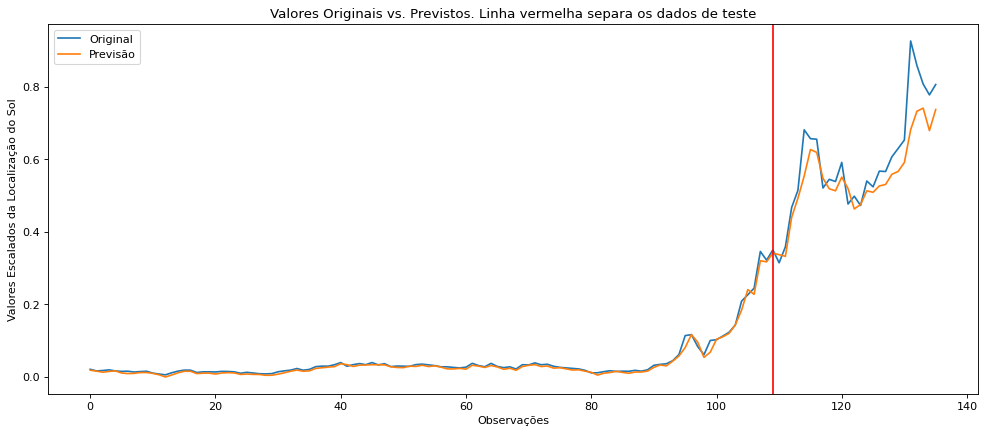

In [22]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Original', 'Previsão'])
    plt.xlabel('Observações')
    plt.ylabel('Valores Escalados da Localização do Sol')
    plt.title('Valores Originais vs. Previstos. Linha vermelha separa os dados de teste')

plot_result(trainY, testY, train_predict, test_predict)

### Reporte do resultado obtido


Colocando um Dropout de 20% depois das camadas LSTM e comparando com o primeiro model o erro no treino subiu um pouquinho (de 0.006 para 0.007). Já no teste, o erro aumentou bem mais (de 0.049 para 0.071). O Dropout ajudou a diminuir o overfitting, deixando o aprendizado mais suave no treino. No fim das contas, o modelo simples com apenas uma camada LSTM ainda se saiu melhor.


# Construindo e avaliando o modelo - Parte 4

- Finalmente, modifique o modelo para que ele tenha 4 blocos LSTM (50 unidades ocultas) + Dropout (20 %) antes da camada Dense.

### Criando o modelo

In [26]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=input_shape, activation=activation[0], return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(hidden_units, input_shape=input_shape, activation=activation[0], return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(hidden_units, input_shape=input_shape, activation=activation[0], return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(hidden_units, input_shape=input_shape, activation=activation[0], return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1), activation=['tanh', 'tanh'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Treinando o modelo

In [27]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=1, verbose=2)

Epoch 1/20
109/109 - 5s - 42ms/step - loss: 0.0015 - val_loss: 0.0395
Epoch 2/20
109/109 - 2s - 19ms/step - loss: 3.1835e-04 - val_loss: 0.0089
Epoch 3/20
109/109 - 1s - 9ms/step - loss: 0.0011 - val_loss: 0.2000
Epoch 4/20
109/109 - 1s - 12ms/step - loss: 0.0015 - val_loss: 0.0159
Epoch 5/20
109/109 - 2s - 16ms/step - loss: 0.0017 - val_loss: 0.0195
Epoch 6/20
109/109 - 1s - 11ms/step - loss: 6.6937e-04 - val_loss: 0.0344
Epoch 7/20
109/109 - 1s - 9ms/step - loss: 5.1714e-04 - val_loss: 0.0827
Epoch 8/20
109/109 - 1s - 12ms/step - loss: 5.5039e-04 - val_loss: 0.0902
Epoch 9/20
109/109 - 1s - 9ms/step - loss: 5.0368e-04 - val_loss: 0.0092
Epoch 10/20
109/109 - 1s - 10ms/step - loss: 0.0012 - val_loss: 0.0132
Epoch 11/20
109/109 - 1s - 11ms/step - loss: 2.9579e-04 - val_loss: 0.0217
Epoch 12/20
109/109 - 1s - 9ms/step - loss: 1.9180e-04 - val_loss: 0.0121
Epoch 13/20
109/109 - 1s - 10ms/step - loss: 6.5344e-04 - val_loss: 0.0711
Epoch 14/20
109/109 - 1s - 10ms/step - loss: 2.7412e-04 - 

### Avaliando o treinamento

Raíz do Erro Médio Quadrático

In [28]:
def print_error(trainY, testY, train_predict, test_predict):
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))

    print('Raíz do Erro Médio Quadrático para Treino: %.3f' % (train_rmse))
    print('Raíz do Erro Médio Quadrático para Teste: %.3f' % (test_rmse))

train_predict = model.predict(trainX)
test_predict = model.predict(testX)

print_error(trainY, testY, train_predict, test_predict)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Raíz do Erro Médio Quadrático para Treino: 0.017
Raíz do Erro Médio Quadrático para Teste: 0.178


Plot de valores das ações vs valores previstos

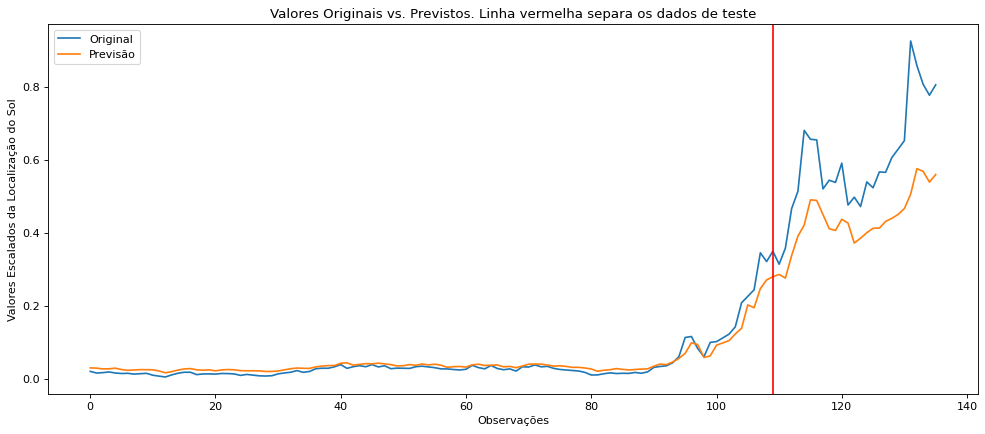

In [29]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Original', 'Previsão'])
    plt.xlabel('Observações')
    plt.ylabel('Valores Escalados da Localização do Sol')
    plt.title('Valores Originais vs. Previstos. Linha vermelha separa os dados de teste')

plot_result(trainY, testY, train_predict, test_predict)

### Reporte do resultado obtido


Mexer no modelo para ter 4 blocos LSTM com 50 unidades ocultas cada, e ainda um Dropout de 20% entre as camadas, não deu certo. A raiz do erro médio quadrático (RMSE) no treino foi para 0.017, e o erro no teste subiu pra 0.178, o pior resultado de todos. No gráfico, deu pra ver que os valores reais e os que o modelo previu ficaram bem diferentes, ou seja, o modelo não conseguiu entender o padrão da série temporal.

# Conclusão final

| Arquitetura                                  | RMSE Treino | RMSE Teste | Observações                                                   |
|---------------------------------------------|-------------|------------|----------------------------------------------------------------|
| 1 LSTM (50 unidades)                         | **0.006**   | **0.049**  | Melhor desempenho geral; boa sobreposição no gráfico          |
| 2 LSTM (50 unidades cada)                    | 0.011       | 0.057      | Leve piora; aumento do erro por maior complexidade            |
| 2 LSTM + Dropout (20%)                       | 0.007       | 0.071      | Regularização ajudou no treino, mas prejudicou a generalização|
| 4 LSTM + Dropout (20%)                       | 0.017       | **0.178**  | Pior desempenho; gráfico com previsões distantes              |


Os resultados mostram que aumentar demais a complexidade do modelo, mesmo usando técnicas para evitar o overfitting como Dropout, nem sempre melhora o desempenho. Isso acontece principalmente em conjuntos de dados mais simples ou com poucos dados. O modelo original, com apenas uma camada LSTM de 50 unidades, continua sendo o melhor em precisão e capacidade de generalizar.
